## 4.2 Exploratory data analysis (EDA)

In this activity, we apply EDA methods on two real datasets. The first one is fairly large dataset for city in Canada "yellowknife_canada.osm" and the other one for titanic dataset. We start with manual auditing of the data then use EDA methods for better exploration. 

### YellowKnife OSM data:

In [1]:
import xml.etree.ElementTree as ET
from collections import defaultdict
import re


In [2]:
street_type_re = re.compile(r'\S+\.?$', re.IGNORECASE) # to chop out words

street_types = defaultdict(int) # to count street types

street_names = [] 

def audit_data(street_types, street_name):
    m = street_type_re.search(street_name)
    if m:
        street_type = m.group()
        # if street_type not in expected:
        # street_types[street_type].add(street_name)
       
        street_names.append(street_name)
        street_types[street_type] += 1

def print_info(d):
    keys = d.keys()
    keys = sorted(keys, key = lambda s: s.lower())
    for k in keys:
        v = d[k]
        print ("%s: %d" % (k,v))
        
# look for street type addresses, street is the generic name for all (e.g. avenue, road, lane etc) 
def is_street_name(elem):
    return (elem.tag == "tag") and (elem.attrib['k'] == "addr:street")


In [3]:
osm_file = open("yellowknife_canada.osm", "r") 

streets = [] 
# parse the osm, list all the values that are of type street
for event, elem in ET.iterparse(osm_file):
        if is_street_name(elem):
            audit_data(street_types,elem.attrib['v']) # 
            streets.append(elem.attrib['v']) 

In [4]:
len(streets)

1844

In [5]:
streets

['Beck Court',
 'Magrum Crescent',
 'Kam Lake Road',
 'Forrest Drive',
 'Butler Road',
 'Williams Avenue',
 'Matonabee Street',
 'Veterans Memorial Drive',
 'Kasteel Drive',
 'Finlayson Drive North',
 'Forrest Drive',
 'Taylor Road',
 'Banke Crescent',
 'England Crescent',
 'Williams Avenue',
 'Albatross Court',
 'Calder Crescent',
 'Herriman Road',
 'Sissons Court',
 'Finlayson Drive',
 'Borden Drive',
 'Woolgar Avenue',
 'Wong Court',
 '57 Street',
 'Bristol Avenue',
 'Range Lake Road',
 'Magrum Crescent',
 'Borden Drive',
 'Magrum Crescent',
 'Forrest Drive',
 'Dagenais Drive',
 'Forrest Park',
 'Catalina Drive',
 'Gitzel Street',
 'Rivett Crescent',
 'Woolgar Avenue',
 'Jeske Crescent',
 'Finlayson Drive',
 'Range Lake Road',
 'Jeske Crescent',
 'Jason Court',
 '51A Avenue',
 'Knutsen Court',
 'Stevens Crescent',
 'Kasteel Drive',
 'Loutitt Street',
 'Glowach Court',
 'Jeske Crescent',
 'Finlayson Drive North',
 'Loutitt Street',
 'Lanky Court',
 'Range Lake Road',
 'Finlayson Driv

In [6]:
# Sort the list of streets
streets.sort()

In [7]:
# group-by using DataFrame
import pandas as pd

df = pd.DataFrame(streets)

df[0:5]

,0
0,41 Street
1,41 Street
2,41 Street
3,41 Street
4,41 Street


In [8]:
gdf = df.groupby([0]).count()
gdf[-5:]

""
0
Wiley Road
Wilkinson Crescent
Williams Avenue
Wong Court
Woolgar Avenue


In [9]:
len(gdf) 

178

In [10]:
# 178... still too big to look at?
gdf

""
0
41 Street
41A Street
43 Street
44 Street
44th Street
45 Street
46 Street
47 Street
48 Street


In [11]:
# Here's a more managable view:
street_types

defaultdict(int,
            {'4': 2,
             'Ave': 1,
             'Avenue': 358,
             'Avenue)': 2,
             'Boulevard': 14,
             'Court': 162,
             'Crescent': 164,
             'Drive': 445,
             'La': 4,
             'Lane': 12,
             'North': 30,
             'Park': 10,
             'Place': 4,
             'Road': 260,
             'Street': 318,
             'Tili': 58})

### Observations from data statistics:
* One of the street types is '4'. What does it mean?
* There are different forms of Avenue type: 'Ave', 'Avenue' and 'Avenue'
* You also will notice that there is type   'La' and  'Lane' 
* What 'North' type mean?
* What is a 'Tili'?

Let's look into some of these using the stored street_names

First, we look at '4'

In [12]:
sub = '4'
print ("\n".join(s for s in street_names if sub in s)) # look through all the contents of street_names then look in each of those for sub

Highway  4
54 Street
54 Street
54 Street
54 Street
Highway  4
54 Street
54 Street
48 Street
54 Street
49 Avenue
49 Avenue
44 Street
46 Street
47 Street
45 Street
46 Street
44 Street
49 Street
54 Street
45 Street
44 Street
49A Avenue
48 Street
48 Street
54 Street
49 Street
54 Street
54 Street
45 Street
46 Street
49 Avenue
48 Street
44 Street
47 Street
44 Street
49 Street
47 Street
49 Avenue
45 Street
49 Avenue
49 Street
49 Avenue
44 Street
54 Street
43 Street
49 Street
46 Street
54 Avenue
54 Avenue
47 Street
49A Avenue
48 Street
45 Street
49A Avenue
54 Street
54 Street
48 Street
54 Avenue
46 Street
48 Street
49A Avenue
54 Avenue
46 Street
47 Street
47 Street
47 Street
44 Street
54 Street
49 Street
54 Street
44 Street
49 Avenue
49 Street
49 Street
49 Street
48 Street
47 Street
54 Street
41 Street
49A Avenue
54 Street
46 Street
48 Street
48 Street
54 Street
43 Street
44 Street
49 Avenue
48 Street
44 Street
49 Avenue
47 Street
48 Street
49A Avenue
49 Street
45 Street
54 Street
49 Street
45

In [13]:
# there are a lot, try ' 4'
sub = ' 4'
print ("\n".join(s for s in street_names if sub in s))

Highway  4
Highway  4


So the problem is'Highway 4' doesn't fit into the pattern of name/type (e.g 'Queen Street'). Therefore, it should be treated as a special case. 

However, is this also applicable for Freeway, Motorway, Tollway, Expressway etc.?

The second problem to fix is for 'Avenue' type. 

In [14]:
sub = 'Avenue)'
print ("\n".join(s for s in street_names if sub in s))

Franklin Avenue (50th Avenue)
Franklin Avenue (50th Avenue)


We notices another problem that the streets might have two names

Define this search for reuse to find a specific string in a name/type etc. 

In [15]:
def search(this, that): # look for this in that
    print ("\n".join(s for s in that if this in s))

In [16]:
search(' 4',street_names) # testing

Highway  4
Highway  4


In [17]:
search('North', street_names)

Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Finlayson Drive North
Forrest Drive North
Forrest Drive North


Another special case? 

Is the type 'Drive'?

Is there a Forrest Drive South?

In [18]:
search('South', street_names)


The way we explore data so far is manual. Another efficient way of doing that is to explore data with EDA methods discussed in chapter 2 in this module. 

Thus, we use exploratory plotting to visualise data.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(street_types))
y = street_types.values()

x,y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [2, 12, 14, 162, 4, 10, 445, 4, 318, 58, 164, 1, 30, 358, 260, 2])

In [20]:
%matplotlib inline

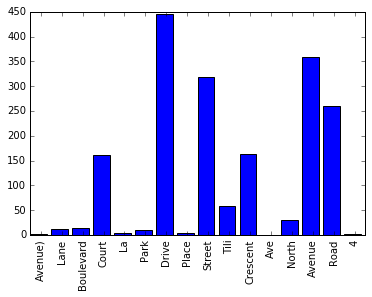

In [21]:
plt.bar(x, y)

keys = list(street_types)

plt.xticks(x + .5, keys, rotation='vertical') # flip so we can read

plt.show()

And we can see the same problems in the one 'graphical summary'
* '4'!?
* 'Ave' and 'Avenue' and 'Avenue)'
* 'La' vs 'Lane'
* 'North'?
* What is a 'tili'?

#### So what are the pros & cons of the various ways to explore data?
(and with more numerical data you can/should use basic stats, e.g. mean, max, min etc.)



## A snapshot of Yellowknife.osm in a GIS system:

<img src= "yellowknife.png" >


In this file, we only interested in  looking at the node and way tags, then the 'tag' then the 'street:addr' change: 

elem.attrib['k'] == "addr:street"

Another way to process this is using the if street_type not in expected: except do it on higher level tags. 



### Titanic data:
We use another dataset which has a mix of numerical & categorical data: Titanic 

In [22]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('titanic passenger list.csv') 
# Reading the dataset in a dataframe using Pandas

In [23]:
len(df1) # how many records?

1309

In [24]:
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The data is sorted by class then name...

#### We can see that 'survived' appears to be 0/1, what is the explanation of that?
#### What is sibsp?
#### What is parch?
#### What is embarked ('C' & 'S')?
#### What is body?
So the above tells you that there are 14 columns x 1309 rows or you can just use:

DataFrame.shape

In [25]:
df1.shape # 1309 x 14 records

(1309, 14)

In [26]:
df1.info() # a mixture of Objects (text) and numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [27]:
df1.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Probably one of the more useful summary tools is 'describe()'

It picks out all the numeric data, gives us totals, means, max, min etc.

You can notice that (left to right) pclass & survived are compelete with no missing values (1309.00 = 1309), however about 300 ages are missing. 

There is only one person didn't pay a fare? (maybe the captain..)

You also notice from the above table that some fares are 0 (could it be the same one for the captain?)

The max fare is 512.329200. It seemed to be very high or is it might be converted from another units?

At far right 'body' is sparse (only 121 values)

Values in pclass look like 1,2,3. 

In [28]:
df1['pclass'].unique()

array([1, 2, 3])

In [29]:
df1['sex'].unique() # just male & female

array(['female', 'male'], dtype=object)

In [30]:
df1['sex'].value_counts() # we can count (and check that 843 + 466 = 1309...)

male      843
female    466
Name: sex, dtype: int64

In [31]:
843 + 466

1309

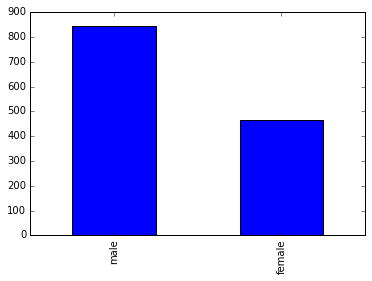

In [32]:
# or plot
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
df1['sex'].value_counts().plot(ax=ax, kind='bar')

In [33]:

df1['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

embarked is 'S', 'C', nan, 'Q'

What do the letters mean. How many missing values are there?

Check the wikipedia page to find out that https://en.wikipedia.org/wiki/RMS_Titanic"Southampton... Additional passengers were picked up at Cherbourg and Queenstown."

So that would seem to be the S, 'Southampton'


In [34]:
df1['embarked'].value_counts() # notice that 'nan' doesn't count or isn't counted

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [35]:
914 + 270 + 123 

1307

In [36]:
# there are two missing?

In [37]:
df1['fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
10.5000    35
7.7750     26
7.2292     24
7.9250     23
26.5500    22
7.2250     21
7.8542     21
8.6625     21
7.2500     18
0.0000     17
21.0000    14
9.5000     12
16.1000    12
69.5500    11
27.7208    11
14.5000    11
7.8792     10
7.7958     10
14.4542    10
15.5000    10
15.2458     9
24.1500     9
7.0500      9
56.4958     8
52.0000     8
           ..
3.1708      1
12.6500     1
12.0000     1
28.7125     1
14.0000     1
15.0000     1
13.7917     1
31.6833     1
9.3250      1
4.0125      1
8.6542      1
7.8000      1
8.6833      1
7.1417      1
6.2375      1
15.5792     1
8.3625      1
8.0292      1
8.4333      1
32.3208     1
7.0458      1
8.4042      1
6.4500      1
7.8208      1
25.7000     1
34.6542     1
9.2167      1
7.2833      1
7.5750      1
8.9625      1
Name: fare, dtype: int64

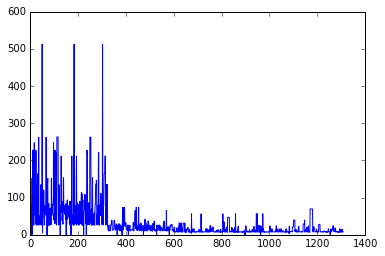

In [38]:
# look at fares, seems like a total mess
plt.plot(df1['fare'])

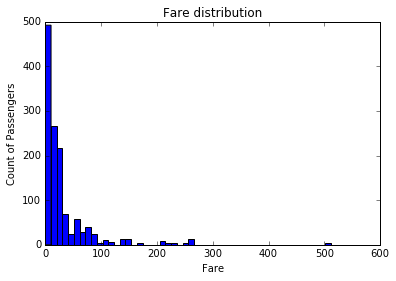

In [39]:
# that's not quite right, it's showing all ~1300 fares left to right
# try another type of plot, histogram, change bins to get different views 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df1['fare'], bins = 50, range = (df1['fare'].min(),df1['fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

/Users/Ash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


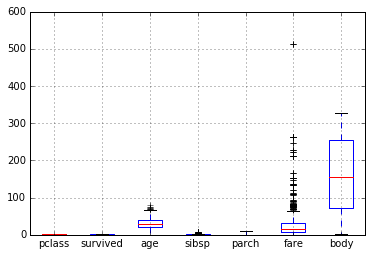

In [40]:
# another way to look at data, boxplots, especially with outliers
bp = df1.boxplot()

# We can boxplot an entire DataFrame, quick & nasty, ignores non-numeric data too


/Users/Ash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


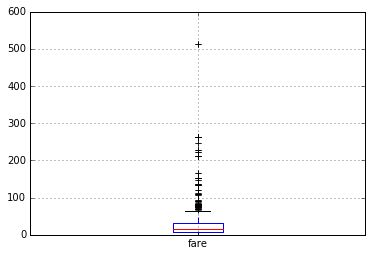

In [41]:
# just look at fare
bp = df1.boxplot(column='fare')

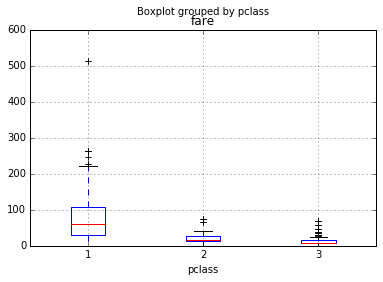

In [42]:
# but there are three 'classes', separate them:
df1.boxplot(column='fare', by = 'pclass')

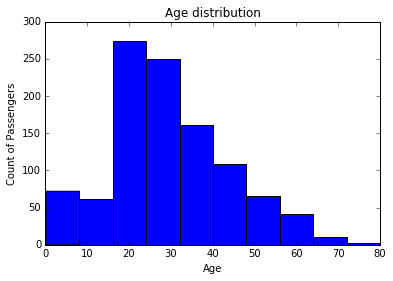

In [43]:
# do similarly with ages
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df1['age'], bins = 10, range = (df1['age'].min(),df1['age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

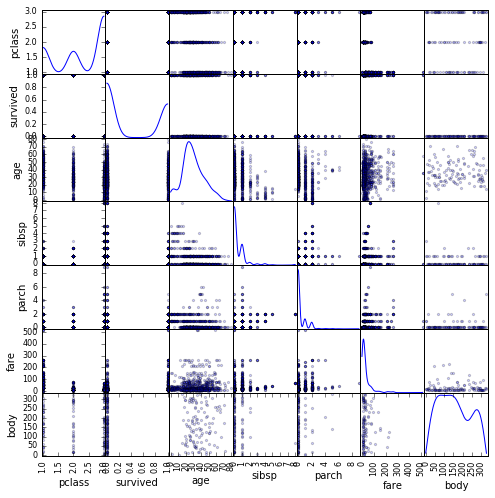

In [44]:
# a multiscatter matrix? Not always useful
from pandas.tools.plotting import scatter_matrix

sm = scatter_matrix(df1, alpha=0.2, figsize=(8, 8), diagonal='kde')

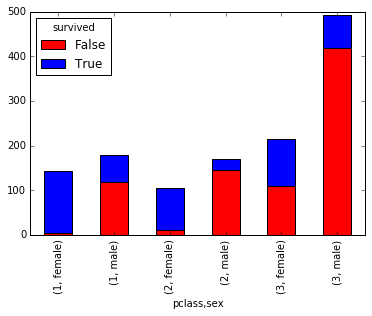

In [45]:
# just to complete the story... what were some of the factors for survival?


ct = pd.crosstab([df1.pclass, df1.sex], df1.survived.astype(bool))
ct.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

### Plotting non-numerical data

In [46]:
df1['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [47]:
df1['sex'].unique()

array(['female', 'male'], dtype=object)

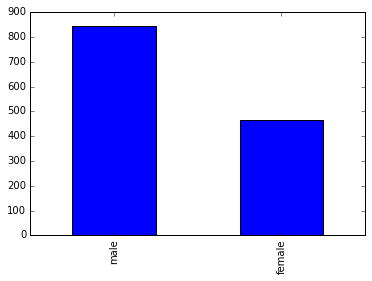

In [48]:
fig, ax = plt.subplots()
df1['sex'].value_counts().plot(ax=ax, kind='bar')

In [49]:
df1['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

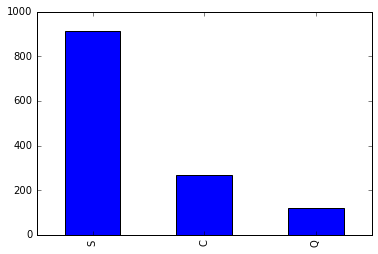

In [50]:
fig, ax = plt.subplots()
df1['embarked'].value_counts().plot(ax=ax, kind='bar')

In [52]:
# note that the something appears to be missing, the 'nan' (it's 'Not A Number', not granny)
# do you want to plot nan anyway?

In [51]:
sum(df1['embarked'].isnull())

2

In [52]:
temp = df1['embarked'].value_counts()

In [53]:
temp

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [54]:
temp['S']

914

In [55]:
temp['NaN'] = sum(df1['embarked'].isnull())

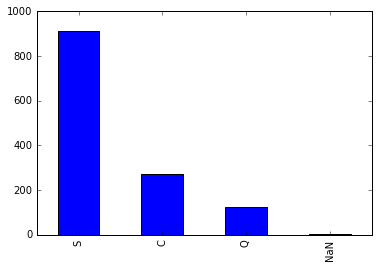

In [57]:
fig, ax = plt.subplots()
temp.plot(ax=ax, kind='bar')